In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Convolution2D, MaxPooling2D, Flatten
import numpy as np

Using TensorFlow backend.


In [2]:
import skimage
import skimage.io
import os
from nbutil import imshow_multi, to_pil
import random

In [3]:
dir = '../data/maps/train'
image_names = [os.path.join(dir, name) for name in os.listdir(dir) if name.endswith('.jpg')]


In [4]:
image_names[1]

'../data/maps/train/393.jpg'

(600, 1200, 3)


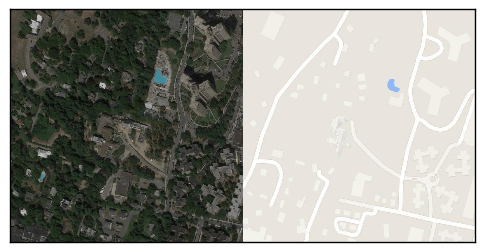

In [5]:
%matplotlib inline

def load_image(path):
    # load image
    img = skimage.io.imread(path)
    img = img[:,:,:3] # drop alpha channel
    return img / 255.0

image = load_image('../data/maps/train/100.jpg')
print image.shape
imshow_multi([image])


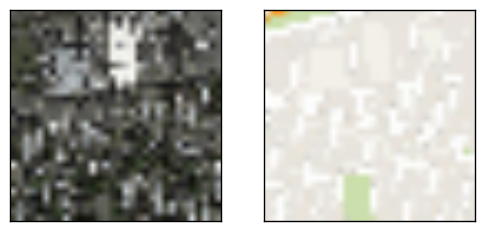

In [13]:
%matplotlib inline

from skimage.transform import resize as rsz

def random_image_pair():
    filename = random.choice(image_names)
    img = load_image(filename)
    left = img[:, :600, :]
    right = img[:, 600:, :]
    def resize(img):
        return rsz(img, [32, 32])
    return resize(left), resize(right)

l,r = random_image_pair()
imshow_multi([l, r])

In [21]:
def make_batch(BATCH_SIZE=16):
    images = []
    labels = []
    for _ in xrange(BATCH_SIZE/2):
        left, right = random_image_pair()
        
        images.append(left)
        labels.append([1,0])
        
        images.append(right)
        labels.append([0,1])
    return np.array(images), np.array(labels)


In [17]:
LAYER_CHANNELS = [32, 64, 64, 64]

In [28]:
model = Sequential()

for i, channels in enumerate(LAYER_CHANNELS):
    if i == 0:
        model.add(Convolution2D(channels, 3, 3, border_mode='same', input_shape=[32, 32, 3]))
    else:
        model.add(Convolution2D(channels, 3, 3, border_mode='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_19 (Convolution2D) (None, 32, 32, 32)    896         convolution2d_input_5[0][0]      
____________________________________________________________________________________________________
activation_27 (Activation)       (None, 32, 32, 32)    0           convolution2d_19[0][0]           
____________________________________________________________________________________________________
maxpooling2d_19 (MaxPooling2D)   (None, 16, 16, 32)    0           activation_27[0][0]              
____________________________________________________________________________________________________
convolution2d_20 (Convolution2D) (None, 16, 16, 64)    18496       maxpooling2d_19[0][0]            
___________________________________________________________________________________________

In [26]:
opt = keras.optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [20]:
# while True:
#     X_batch, Y_batch = make_batch()
#     print model.train_on_batch(X_batch, Y_batch)
    

[0.69308704, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0.5]
[8.0590477, 0

KeyboardInterrupt: 

In [27]:
X_batch, Y_batch = make_batch(256)
model.fit(X_batch, Y_batch, batch_size=32, nb_epoch=1, verbose=1)

Epoch 1/1
256/256 [==============================] - 0s - loss: 7.1451 - acc: 0.5000     
